Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", remove any ```raise NotImplementedError()``` and enter your student ID below:

STUDENT_ID = "200878566"

---

# MTH793P - Coursework 6

This is a template notebook for the computational exercises of [Coursework 6](https://qmplus.qmul.ac.uk/pluginfile.php/2462232/mod_resource/content/1/coursework06.pdf) of the module MTH793P, Advanced machine learning. Closely follow the instructions in this template in order to complete the assessment and to obtain full marks. For the submitted notebook, please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions.

Author: [Martin Benning](mailto:m.benning@qmul.ac.uk)

Date: 05.02.2021

As usual, we begin by loading the necessary libraries.

In [1]:
%matplotlib inline
import numpy as np
from skimage.data import astronaut
from skimage import io as io1
from scipy import io as io2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Singular value decomposition

First, we load the image of Eileen Collins and store it in a variable named *image*.

In [2]:
image = astronaut()

We visualise the image with the following cell.

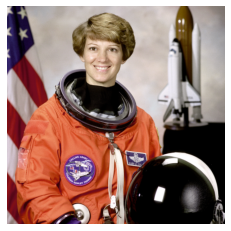

In [3]:
plt.imshow(image)
plt.axis('off') ;

Next, we store *image* as a matrix *matrix* of size $512 \times 1536$.

In [4]:
matrix = image.reshape(512,1536)

Next, we compute the singular decomposition $\text{matrix} = U\Sigma V^\top$ of *matrix* and store the left singular vectors in the array *U*, the transpose of the right singular vectors in *V_transpose* and the singular values in *singular_values*...

In [5]:
import numpy.linalg as la

In [6]:
U,singular_values,V_transpose = la.svd(matrix)

...and visualise the singular values (without and with logarithmic scaling).

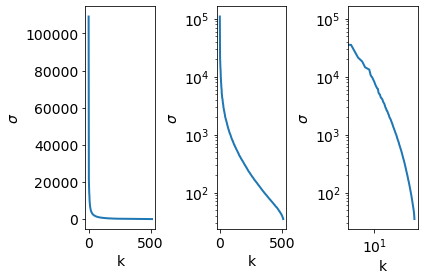

In [7]:
plt.subplot(1, 3, 1)
plt.plot(singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 2)
plt.semilogy(singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 3)
plt.plot(singular_values, linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('singular-values.pdf')

Subsequently, we set all singular values after the index *index* to zero and print the ratio of the Frobenius norms of the approximation and the original matrix. The closer this ratio is to one, the better the approximation. Please experiment with different choices of *index*.

In [8]:
def svd_ratio(array, index):
    fro_norm = la.norm(array)
    u,eps,v = la.svd(array)
    new_eps = eps[:index]
    approx_fro = la.norm(new_eps)
    
    ratio = approx_fro/fro_norm
    
    return ratio, new_eps
    
approx_ratio = lambda index: svd_ratio(matrix,index)

In [9]:
# YOUR CODE HERE

index = 10
ratio,_ = approx_ratio(index)
print('Ratio of Frobenius norms for low-rank approximation and original matrix: %.4f' %ratio)


Ratio of Frobenius norms for low-rank approximation and original matrix: 0.9770


We visualise the cumulative sum of the singular values with the following cell.

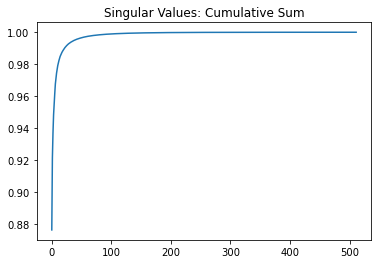

In [10]:
plt.plot(np.sqrt(np.cumsum(singular_values ** 2)/np.sum(singular_values ** 2)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

We write a function **svd_thresholding** that takes an array *input_matrix* and a natural number *rank* as its input arguments and return the optimal approximation of *input_matrix* of rank *rank* in the sense of the Frobenius norm.

In [11]:
def svd_thresholding(input_matrix, rank):
    U,d,V = la.svd(input_matrix, full_matrices = False)
    d[rank:] = 0
    d_matrix = np.diag(d)
    approx = U @ d_matrix @ V

    return approx

Test your function *svd_thresholding* by applying it to the matrix *matrix* for different choices of *rank*, store at least one approximation in a variable named *matrix_approximation*, convert it to an image named *image_approximation* and visualise this image with suitable tools from the Matplotlib library.

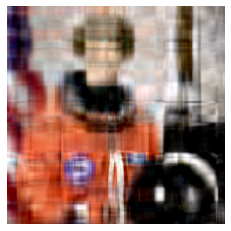

In [12]:
# YOUR CODE HERE
matrix_approximation = svd_thresholding(matrix,index)
image_approximation = matrix_approximation.reshape(512,512,3).astype(int)
image_approximation[image_approximation < 0] = 0
image_approximation[image_approximation > 255] = 255
plt.imshow(image_approximation)
plt.axis('off') ;


The following cells -- one visible, the other one hidden -- test your function with specific examples that worth one mark each, or **2/10 marks** in total.

In [13]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(svd_thresholding(np.array([[3, 2, 2], [2, 3, -2]]), 1), np.array([[2.5, 2.5, 0], \
                                                                                         [2.5, 2.5, 0]]))

If you want to, you can save the images *image* and *image_approximations* to your hardrives with the following commands.

In [14]:
io1.imsave('svd-example-k-' + str(index) + '.png', np.rint(image_approximation).clip(0, 255).astype(np.uint8))
io1.imsave('astronaut.png', image)

We write two functions **standardise** and **de_standardise**. The first function should standardise the columns of the input argument *matrix* and return the standardised version together with the column-means and the column-standard-deviations. The second function inverts the operations of the first function. It takes arguments *matrix*, *means* and *stds* and multiplies *matrix* with the column-standard-deviations *stds* and adds back the column-means *means*.

In [14]:
def standardise(matrix):
    row_of_means = np.mean(matrix, axis=0)
    standardised_matrix = matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

def de_standardise(matrix, means, stds):
    mtrx = np.copy(matrix) * stds
    return mtrx + means

We test both functions with four tests -- two visible, three hidden -- that are worth one mark each, or **5/10 marks** in total.

In [15]:
test_matrix = np.array([[5, 4, 1], [5, 5, 0], [0, 0, 5], [1, 0, 4]]).astype('float64')
std_matrix, means, stds = standardise(test_matrix)
assert_array_almost_equal(means, np.array([2.75, 2.25, 2.5]))

In [16]:
assert_array_almost_equal(stds, np.array([2.27760839, 2.27760839, 2.06155281]))

We repeat our previous experiment of computing the singular value decomposition, but standardise the matrix *matrix* first and store it in a variable named *matrix_standardised*. Store the corresponding singular values in a variable named *std_singular_values*.

In [17]:
# YOUR CODE HERE
matrix_standardised,means,stds = standardise(matrix)
_, std_singular_values ,_ = la.svd(matrix_standardised) 

As before, we visualise the decay of the singular values. 

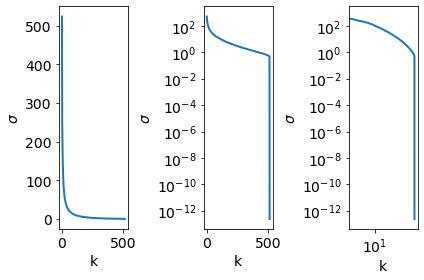

In [18]:
# YOUR CODE HERE
plt.subplot(1, 3, 1)
plt.plot(std_singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 2)
plt.semilogy(std_singular_values, linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1, 3, 3)
plt.plot(std_singular_values, linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel('$\sigma$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('std-singular-values.pdf')

The behaviour is similar as before, but the range of the singular values has changed. We visualise the cumulative sum of the singular values and compare the cumulative sum with the non-standardised version.

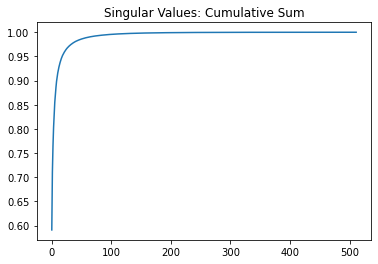

In [19]:
# YOUR CODE HERE
plt.plot(np.sqrt(np.cumsum(std_singular_values ** 2)/np.sum(std_singular_values ** 2)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

Approximate the standardised matrix *matrix_standardised* with the optimal approximation of rank *rank* in the sense of the Frobenius norm and visualise your result. *Hint*: use the function *de_standardise* for this task.

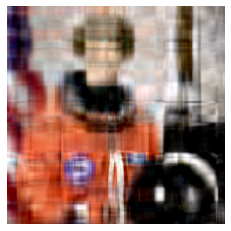

In [20]:
# YOUR CODE HERE
matrix_approximation = svd_thresholding(de_standardise(matrix_standardised,means,stds),index)
image_approximation = matrix_approximation.reshape(512,512,3).astype(int)
image_approximation[image_approximation < 0] = 0
image_approximation[image_approximation > 255] = 255

plt.imshow(image_approximation)
plt.axis('off') ;

## Eigenfaces

In the next part of this coursework, we work with a dataset consisting of numerous faces and create a basis of so-called eigenfaces. First, we update the sizes and fontsizes of the figures in this notebook. 

In [21]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams.update({'font.size': 16})

Now we load the Yale faces B mat-file *yale-b-faces.mat* with the help of scipy and store the data into the matrix *all_faces*. The dataset contains 2410 images of size $192 \times 168$ of 38 different people. The number of images per person is stored in the vector *number_of_faces_per_person*.

In [22]:
mat_file_import = io2.loadmat('yale-b-faces.mat')
all_faces = mat_file_import['faces']
number_of_faces_per_person = mat_file_import['nfaces'].reshape(-1)

We visualise a random selection of images from the Yale face B dataset with the following cell.

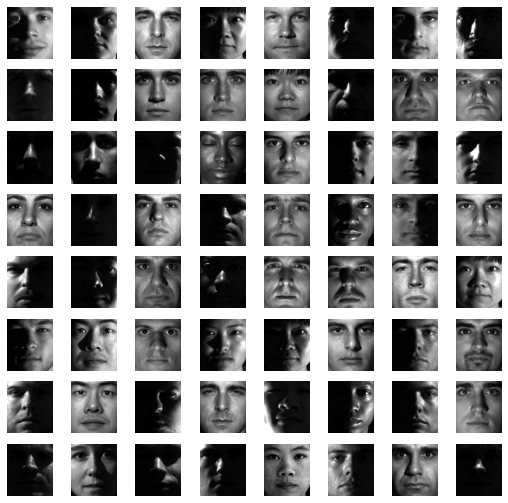

In [23]:
random_indices = np.random.permutation(all_faces.shape[1])
for counter in range(number_of_faces_per_person[0]):
    plt.subplot(8, 8, counter + 1)
    plt.imshow(all_faces[:, random_indices[counter]].reshape((168, 192)).T, cmap='gray')
    plt.axis('off') 
plt.tight_layout;

Next, we store all standardised face images of the first person in a data matrix *matrix*, the corresponding column-means in an array *means* and the column-standard-deviations in an array *stds*... 

In [24]:
# YOUR CODE HERE

first_person = all_faces[:,:number_of_faces_per_person[0]]
matrix, means, stds = standardise(first_person)

...and visualise the faces via the following cell.

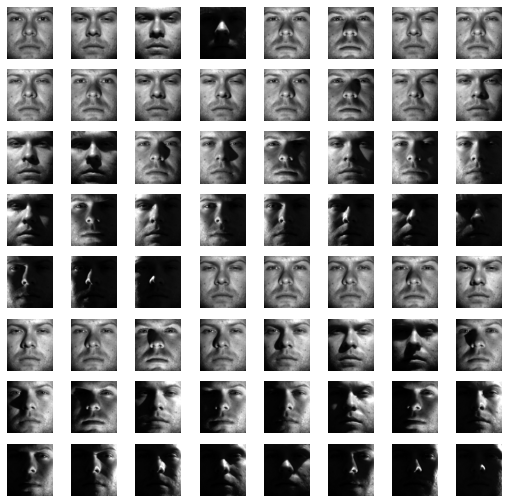

In [25]:
for counter in range(number_of_faces_per_person[0]):
    plt.subplot(8, 8, counter + 1)
    plt.imshow(matrix[:, counter].reshape((168, 192)).T, cmap='gray')
    plt.axis('off') 
plt.tight_layout;

For our first task we compute the best rank-*approximation_index* approximation *approximated_matrix* of *matrix* in the sense of the Frobenius norm. Experiment with different choices of *approximation_index* and visualise your results.

In [26]:
# YOUR CODE HERE
approximation_index = 29
approximated_matrix = svd_thresholding(matrix, approximation_index)


Test your result with the following hidden test for **approximation_index = 29**. A successful test is awarded **1/10** marks.

In [27]:
print("The error in Frobenius norm is {e}.".format(e = np.linalg.norm(approximated_matrix - matrix, 'fro')))

The error in Frobenius norm is 125.85629796563252.


### Approximate image with eigenfaces

Write a function **approximate_with_svd_basis** that approximates an array *vector* with the basis of singular vectors *singular_vectors*. The function should return a vector of linear combinations of the singular vectors that best approximates the vector *vector*.

In [ ]:
#def approximate_with_svd_basis(vector, singular_vectors):
    # YOUR CODE HERE


Compute the (left) singular vectors of *matrix* and approximate the first face of the dataset with an increasing number of singular vectors and visualise your results.

In [ ]:
# YOUR CODE HERE


Repeat the same exercise, but this time choose a face that is different to the faces that form your eigenfaces basis.

In [ ]:
# YOUR CODE HERE


## Sparse PCA

We conclude this coursework with an implementation of sparse PCA as introduced in the lecture note. We write two functions **soft_thresholding** and **sparse_pca**. The function **soft_thresholding** is implementing the soft-thresholding operation

$$ \left( \left(I + \gamma \partial \| \cdot \|_1 \right)^{-1}(z) \right)_j = \begin{cases} z_j - \gamma & z > \gamma \\ 0 & |z_j | \leq \gamma \\ z_j + \gamma & z_j < - \gamma \end{cases} \, . $$

Note that you can use your implementation from MTH786P. The function **sparse_pca** takes the arguments described in the function header and returns the solution of

\begin{align*}
    w^{k + 1} &= \arg\min_{w \in \mathbb{R}^n} \left\{ \alpha \| w \|_1 - \lambda^k \frac{\langle X^\top u^k, X^\top w\rangle}{\| X^\top w^k\|} + \frac{1}{2\tau} \| w - u^k \|^2 \right\} \, ,\label{eq:ipm-sparse-pca}\\
    u^{k + 1} &= \frac{w^{k + 1}}{\| w^{k + 1} \|_p} \, ,\\
    \lambda^{k + 1} &= \frac{\alpha \| u^{k + 1} \|_1}{\| X^\top u^{k + 1} \|} \, .
\end{align*}

after *maximum_no_of_iterations* iterations. Here, the step size parameter $\tau$ is named *step_size*, the balancing parameter $\alpha$ *regularisation_parameter* and the value $p$ for the $p$-norm is *p_norm*. The matrix $X$ is the mathematical notation for the variable *data_matrix*. Implement **sparse_pca** so that it returns the final singular vector and a list of singular values over the course of the iteration.

In [28]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)

    
def sparse_pca(data_matrix, initial_vector, step_size=0.1, regularisation_parameter=1.635, p_norm=2, \
               maximum_no_of_iterations=100, print_output=10):
    
    #PRELIMINARY CONSTANTS/ VECTOR INITIALISATIONS
    
    K = data_matrix@data_matrix.T
    u_k = np.copy(initial_vector)
    lambda_k = (regularisation_parameter * la.norm(initial_vector,1))/la.norm((data_matrix.T @ initial_vector))
    proximal_map = lambda w: soft_thresholding(w, regularisation_parameter*step_size)
    
    #SINGULAR VALUES LIST
    singular_values = []
    
    for i in range(maximum_no_of_iterations):
        
        #CALCULATING THE NEW W

        w_k = proximal_map(u_k + (step_size*regularisation_parameter*lambda_k * \
                                  ((K @ u_k)/(la.norm((data_matrix.T@u_k))))))
        
        #CALCULATING THE NEW U

        u_k = w_k/la.norm(w_k, p_norm)
        
        #CALCULATING THE NEW LAMBDA
        

        lambda_k = (regularisation_parameter * la.norm(u_k,1))/la.norm((data_matrix.T @ u_k))
        
        singular_values.append(lambda_k)
        
        #PRINTING OUTPUT
        
        if ((i+1) % print_output) == 0:
            print('Iteration {a}/{b}. Singular Value : {v}'.format(a = i, b = maximum_no_of_iterations, v = lambda_k))
        
    return u_k, singular_values

    

    # YOUR CODE HERE
    

We initialise a vector with normal distributed random numbers with mean zero and standard deviation one and normalise it with respect to the Euclidean norm.

In [29]:
np.random.seed(13)
p = 2
initial_vector = np.random.randn(matrix.shape[0], 1)
initial_vector = initial_vector / np.linalg.norm(initial_vector, p)

We compute a sparse singular vector for the data matrix *matrix*, the initial vector *initial_vector* and the value *p* for *p_norm*. Store the singular vector in a variable named *singular_vector* and the list of singular values in a variable named *singular_values*.

In [30]:
# YOUR CODE HERE
singular_vector, singular_values = sparse_pca(matrix, initial_vector, p_norm = p)


Iteration 9/100. Singular Value : 0.2098706760428666
Iteration 19/100. Singular Value : 0.20798793075320596
Iteration 29/100. Singular Value : 0.20671731404258603
Iteration 39/100. Singular Value : 0.2059030491986833
Iteration 49/100. Singular Value : 0.20547184809212599
Iteration 59/100. Singular Value : 0.20526318512604003
Iteration 69/100. Singular Value : 0.20516363346666194
Iteration 79/100. Singular Value : 0.20511704390306382
Iteration 89/100. Singular Value : 0.2050954024852396
Iteration 99/100. Singular Value : 0.20508539577877277


In [31]:
U,_,_ = la.svd(matrix)

We visualise this singular vector and compare it to the first traditional singular vector with the following cell.

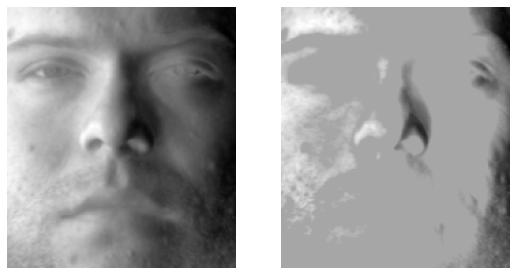

In [32]:
plt.subplot(1,2,1)
plt.imshow(U[:, 0].reshape((168, 192)).T, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(singular_vector.reshape((168, 192)).T, cmap='gray')
plt.axis('off');

We further plot the singular vectors and determine how many percent of entries are non-zero.

Around 38.05 % of coefficients are non-zero.


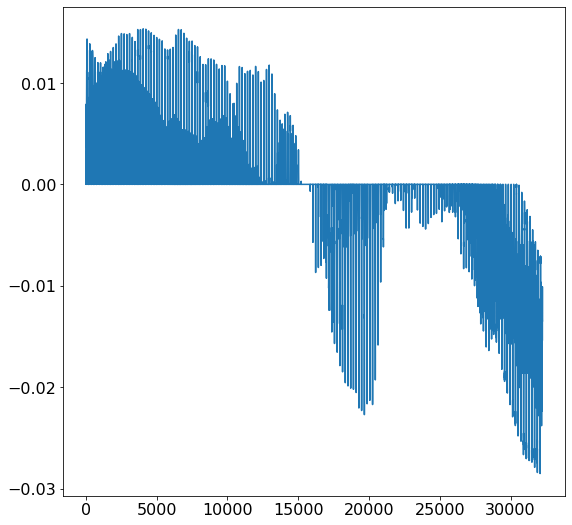

In [33]:
plt.plot(singular_vector)
print("Around {:.2f} % of coefficients are non-zero.".format(100*np.count_nonzero(singular_vector)/len( \
                                                                singular_vector)))

Test your code with the following two tests (one visible, one hidden); both tests are awarded one mark each, or **2/10 marks** in total.

In [34]:
p = 2
initial_test_vector = np.array([1, -1, 1, -1, 1]).astype(np.float64).reshape(-1, 1)
test_matrix = np.random.randint(-5, 5, size=(5, 10))
initial_test_vector = initial_test_vector / np.linalg.norm(initial_test_vector, p)
test_singular_vector, _ = sparse_pca(test_matrix, initial_test_vector, step_size=0.04, \
                                     regularisation_parameter=0.3, p_norm=p)
assert_array_almost_equal(test_singular_vector, np.array([[0.46303975], [-0.1367626], [0.4336254], [0], \
                                                          [0.76082797]]))

Iteration 9/100. Singular Value : 0.05125230038371251
Iteration 19/100. Singular Value : 0.05016688760211807
Iteration 29/100. Singular Value : 0.048823742767392105
Iteration 39/100. Singular Value : 0.04716289595557618
Iteration 49/100. Singular Value : 0.04510888106012733
Iteration 59/100. Singular Value : 0.04256292571262959
Iteration 69/100. Singular Value : 0.04013838973873088
Iteration 79/100. Singular Value : 0.03941212389267424
Iteration 89/100. Singular Value : 0.038457621767211195
Iteration 99/100. Singular Value : 0.0371883865480585
